# Processing Urban-Rural Index Data
This data is a survey from 2013 rating each US county's level of urban development.

1 = Large central metropolitan (Big cities)

2 = Large fringe metropolitan

3 = Medium metropolitan

4 = Small metropolitan

5 = Micropolitan

6 = Non-core (Rural)

You'll need to download this data from https://www.cdc.gov/nchs/data_access/urban_rural.htm#:~:text=NCHSurbruralcodes,XLS%20%E2%80%93%20175%20KB%5D
This link will highlight the thing you need to download--the "NCHSUrbRuralCodes" XLS file.
Download it and place it in the data folder, make sure it's named "NCHSURCodes2013.xlsx".

This may need to be one-hot encoded for a model.

In [2]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

current_dir = os.getcwd()

In [3]:
df = pd.read_excel(os.path.join(current_dir, "..", "Data", "NCHSURCodes2013.xlsx"))
df = df[["FIPS code", "State Abr.", "County name", "2013 code"]].rename(columns={"FIPS code": "FIPS", "State Abr.": "STATECODE", "County name": "COUNTY", "2013 code": "URBAN_RURAL_SCORE"})
df

,FIPS,STATECODE,COUNTY,URBAN_RURAL_SCORE
0,1001,AL,Autauga County,3
1,1003,AL,Baldwin County,4
2,1005,AL,Barbour County,6
3,1007,AL,Bibb County,2
4,1009,AL,Blount County,2
...,...,...,...,...
3144,56037,WY,Sweetwater County,5
3145,56039,WY,Teton County,5
3146,56041,WY,Uinta County,5
3147,56043,WY,Washakie County,6


In [18]:
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})
counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,FIPS,NAME,LSAD,ALAND,AWATER,id,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,6.393875e+08,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,7.504394e+08,4829777.0,2,"POLYGON ((1350485.716 -619831.406, 1350606.534..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1.103572e+09,13943044.0,3,"POLYGON ((1155226.654 -790469.014, 1155326.223..."
3,21,065,00516879,0500000US21065,21065,Estill,06,6.555099e+08,6516335.0,4,"POLYGON ((1390075.380 -684612.798, 1390215.039..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,9.027272e+08,7182793.0,5,"POLYGON ((1386431.679 -594472.514, 1386496.220..."
...,...,...,...,...,...,...,...,...,...,...,...
3227,60,010,01805240,0500000US60010,60010,Eastern,07,6.512486e+07,349724678.0,502,"MULTIPOLYGON (((-933629.942 -3348091.425, -934..."
3228,60,020,01805242,0500000US60020,60020,Manu'a,07,5.762099e+07,464238047.0,503,"MULTIPOLYGON (((-462740.161 -3201385.731, -462..."
3229,60,050,01805241,0500000US60050,60050,Western,07,7.249851e+07,196726219.0,1068,"POLYGON ((-1056182.608 -3393553.386, -1055840...."
3230,60,030,01805243,0500000US60030,60030,Rose Island,00,8.209300e+04,147383994.0,1475,"MULTIPOLYGON (((299577.946 -3124988.639, 29931..."


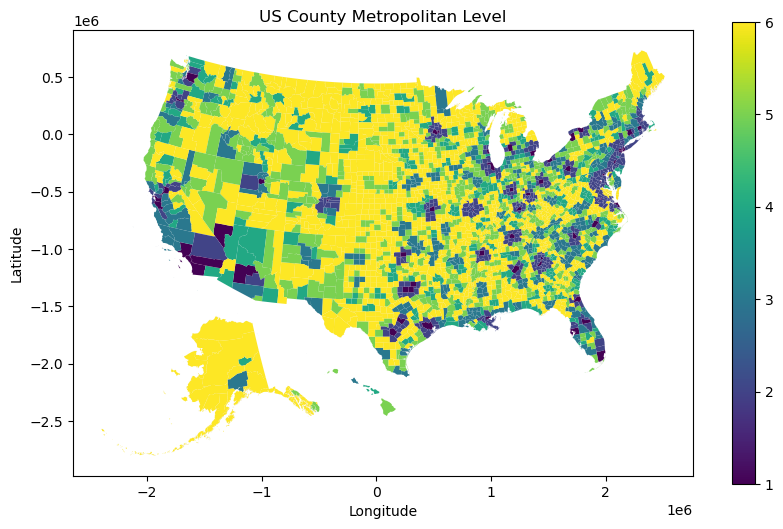

In [21]:

counties["FIPS"] = counties["FIPS"].astype(int)

merged = counties.merge(df, how="inner", left_on="FIPS", right_on="FIPS")

column_to_plot = 'URBAN_RURAL_SCORE'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column=column_to_plot, cmap='viridis', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('US County Metropolitan Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()